### Model Notebook

This is the notebook for model in age gender dectector. Here, we will extracct the data, train it and fit it into our model, and will evaluate our results and optimize the model for better results.

#### Import the Necessary Libraries

In [3]:
import tensorflow as tf
from cv2 import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop

#### Extract data from the data set

If data has not been downloaded, the download it from [Here](https://www.kaggle.com/datasets/jangedoo/utkface-new)

In [2]:
fldr="./UTKFace"

In [3]:
import os
files=os.listdir(fldr)

#### Create a list of images from the dataset

In [4]:
ages = []
genders = []
images = []

for f in files:
    age = int(f.split("_")[0])
    gender = int(f.split("_")[1])
    total = fldr+"/"+f
    print(total)
    image = cv2.imread(total)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (48,48))
    images.append(image)

./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

In [5]:
print(len(images))

23708


#### Create age and gender list from the dataset

In [6]:
for f in files:
    age = int(f.split('_')[0])
    gender = int(f.split('_')[1])
    ages.append(age)
    genders.append(gender)

In [7]:
print(len(ages))
print(len(genders))

23708
23708


10
0


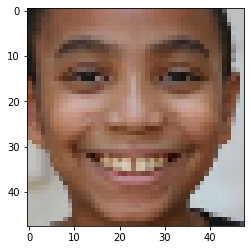

In [8]:
i = 87
plt.imshow(images[i])
print(ages[i])
print(genders[i])

In [9]:
image_arr = np.array(images)
age_arr = np.array(ages)
gender_arr = np.array(genders)

In [10]:
print(gender_arr.size)

23708


In [11]:
np.save(fldr+"image.npy", image_arr)
np.save(fldr+"age.npy", age_arr)
np.save(fldr+"gender.npy",gender_arr)

#### Finding the number of Male and Female samples in dataset

In [12]:
values, counts = np.unique(gender_arr, return_counts=True)
print(counts)
print(values)

[12391 11317]
[0 1]


#### Plotting number of male and female Samples

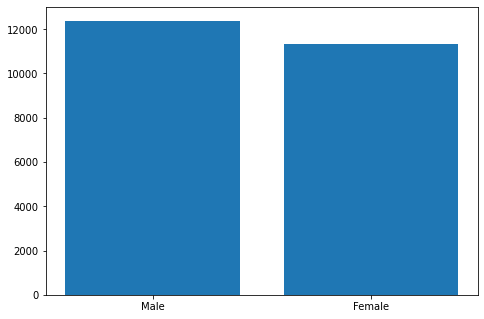

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ["Male", "Female"]
values = [12391, 11317]
ax.bar(gender, values)
plt.show()

#### Finding number of samples in age

In [14]:
values, counts = np.unique(ages, return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


##### Converting age counts to list

In [15]:
val = values.tolist()
cnt = counts.tolist()


#### Plotting the samples age-wise

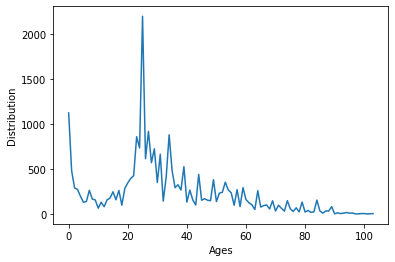

In [16]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel("Distribution")
plt.show()

In [17]:
print(len(genders))
print(len(ages))

23708
23708


#### Defining Labels for Output

In [18]:
labels = []
i = 0
while i < len(ages):
    label = []
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i = i + 1

#### Creating another list of images from exisiting one
#### for bettter learning 

In [19]:
images_f_2 = image_arr/255

In [20]:
images_f_2.shape

(23708, 48, 48, 3)

In [21]:
labels_f = np.array(labels)

#### Splitting the Data Set into test and train

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(images_f_2, labels_f, test_size= 0.25)

In [24]:
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

17781
5927
17781
5927


In [25]:
Y_train[0:5]

array([[25,  1],
       [ 6,  1],
       [26,  1],
       [26,  1],
       [26,  1]])

#### Splitting Y_test and Y_train further
##### For better understanding

In [26]:
Y_train_2 = [Y_train[:,1], Y_train[:,0]]
Y_test_2 = [Y_test[:,1], Y_test[:,0]]

In [27]:
Y_train_2[0][0:5]

array([1, 1, 1, 1, 1])

In [28]:
Y_train_2[1][0:5]

array([25,  6, 26, 26, 26])

In [29]:
print(len(Y_train_2))
print(len(Y_train_2[0]))
print(len(Y_train_2[1]))
print(len(Y_test_2))
print(len(Y_test_2[0]))
print(len(Y_test_2[1]))

2
17781
17781
2
5927
5927


#### Defining the Model

In [6]:
def Convolution(input_tensor, filters):
    x=Conv2D(filters=filters, kernel_size=(3,3), padding="same", strides=(1,1), kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [9]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs, 32)
    maxp_1=MaxPool2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1, 64)
    maxp_2=MaxPool2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2, 128)
    maxp_3=MaxPool2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3, 256)
    maxp_4=MaxPool2D(pool_size=(2,2))(conv_4)
    flatten = Flatten()(maxp_4)
    dense_1=Dense(64, activation='relu')(flatten)
    dense_2=Dense(64, activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1, activation='sigmoid', name='sex_out')(drop_1)
    output_2=Dense(1, activation='relu', name='age_out')(drop_2)
    model=Model(inputs=[inputs], outputs=[output_1, output_2])
    model.compile(loss=["binary_crossentropy", "mae"], optimizer="Adam", metrics=["accuracy"])
    return model

In [10]:
m=model((48,48,3))

In [33]:
m.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 48, 48, 32)   896         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 48, 48, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 activation (Activation)        (None, 48, 48, 32)   0           ['dropout[0][0]']                
                                                                                              

In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [35]:
fle_s='Age_Sex_Detection.h5'
checkpoint=ModelCheckpoint(fle_s, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss', restore_best_weights='True')
callback_list=[checkpoint, Early_stop]

In [36]:
History=m.fit(X_train, Y_train_2, batch_size=64, validation_data=(X_test, Y_test_2), epochs=250, callbacks=callback_list)

Epoch 1/250
278/278 [==============================] - ETA: 0s - loss: 16.9764 - sex_out_loss: 0.6961 - age_out_loss: 16.0944 - sex_out_accuracy: 0.5271 - age_out_accuracy: 0.0463
Epoch 1: val_loss improved from inf to 17.85008, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 84s 294ms/step - loss: 16.9764 - sex_out_loss: 0.6961 - age_out_loss: 16.0944 - sex_out_accuracy: 0.5271 - age_out_accuracy: 0.0463 - val_loss: 17.8501 - val_sex_out_loss: 0.6880 - val_age_out_loss: 17.0024 - val_sex_out_accuracy: 0.5151 - val_age_out_accuracy: 0.0501
Epoch 2/250
278/278 [==============================] - ETA: 0s - loss: 13.7582 - sex_out_loss: 0.6317 - age_out_loss: 12.9437 - sex_out_accuracy: 0.6261 - age_out_accuracy: 0.0456
Epoch 2: val_loss improved from 17.85008 to 11.92757, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 89s 321ms/step - loss: 13.7582 - sex_out_loss: 0.6317 - age_out_loss: 12.9437 - sex_out_accuracy: 0.6261 - a

In [40]:
from keras.models import load_model
Model = load_model('Age_Sex_Detection.h5')
Model.evaluate(X_test, Y_test_2)

186/186 [==============================] - 5s 25ms/step - loss: 7.5019 - sex_out_loss: 0.2705 - age_out_loss: 6.3795 - sex_out_accuracy: 0.8723 - age_out_accuracy: 0.0501


[7.501885414123535,
 0.2704930305480957,
 6.379477024078369,
 0.8722794055938721,
 0.05010966584086418]

In [41]:
pred = Model.predict(X_test)

In [42]:
pred[1]

array([[33.961494],
       [25.222979],
       [30.043865],
       ...,
       [41.351307],
       [32.297764],
       [21.707191]], dtype=float32)

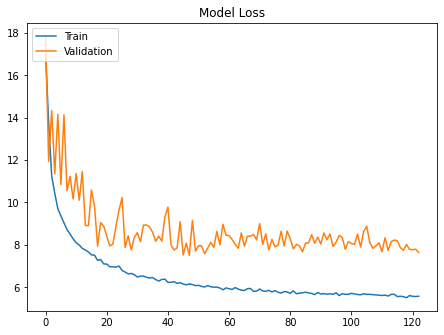

In [44]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=("Epoch")
plt.ylabel=("Loss")
plt.legend(["Train", "Validation"], loc="upper left")
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0, hspace=0.25, wspace=0.35)


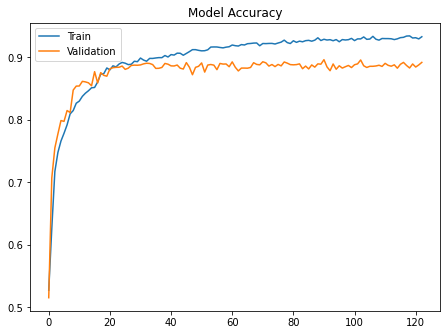

In [45]:
plt.plot(History.history["sex_out_accuracy"])
plt.plot(History.history["val_sex_out_accuracy"])
plt.title("Model Accuracy")
plt.xlabel=("Epoch")
plt.ylabel=("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0, hspace=0.25, wspace=0.35)


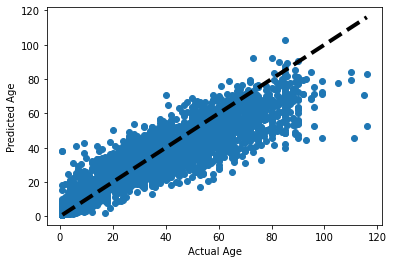

In [49]:
fig,ax = plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].min(), Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--',lw=4)
ax.set_xlabel("Actual Age")
ax.set_ylabel("Predicted Age")
plt.show()

## Making Report of the Model (Gender Only)

In [50]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1
    

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [52]:
report = classification_report(Y_test_2[0], Pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.80      0.87      3054
           1       0.82      0.95      0.88      2873

    accuracy                           0.87      5927
   macro avg       0.88      0.87      0.87      5927
weighted avg       0.88      0.87      0.87      5927



## Making Heatmap of the Model(Gender Only)

In [54]:
results=confusion_matrix(Y_test_2[0], Pred_l)

<AxesSubplot:>

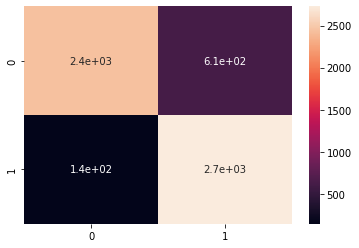

In [55]:
import seaborn as sns
sns.heatmap(results, annot=True)

## Testing the Images Ourself

In [56]:
def test_image(ind,images_f, images_f_2, Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    Pred_l=Model.predict(np.array([image_test]))
    sex_f=["Male", "Female"]
    age=int(np.round(Pred_l[1][0]))
    sex=int(np.round(Pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is " + sex_f[sex])

Predicted Age is 78
Predicted Gender is Female


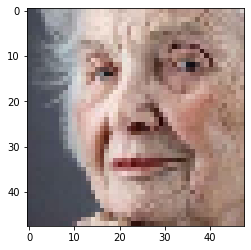

In [58]:
test_image(4, image_arr, images_f_2, Model)

Predicted Age is 10
Predicted Gender is Female


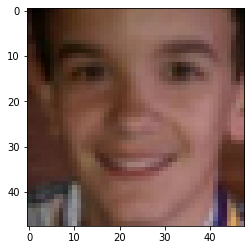

In [59]:
test_image(23, image_arr, images_f_2, Model)

Predicted Age is 13
Predicted Gender is Female


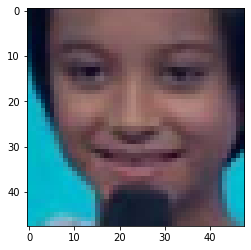

In [60]:
test_image(168, image_arr, images_f_2, Model)

Predicted Age is 25
Predicted Gender is Male


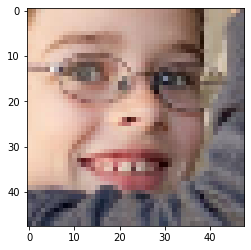

In [65]:
test_image(43, image_arr, images_f_2, Model)

Predicted Age is 26
Predicted Gender is Female


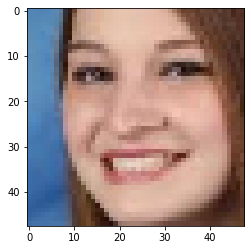

In [66]:
test_image(1288, image_arr, images_f_2, Model)